### 2.2 Import library

In [17]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pymc3 as pm

### 2.3 Reading Data and Visualization

In [2]:
file_beer_sales_2=pd.read_csv('./data/3-2-1-beer-sales-2.csv')
file_beer_sales_2.head(3)

,sales,temperature
0,41.68,13.7
1,110.99,24.0
2,65.32,21.5


In [3]:
# sample size
print(len(file_beer_sales_2))

100


In [5]:
temperature=file_beer_sales_2['temperature']
sales=file_beer_sales_2['sales']

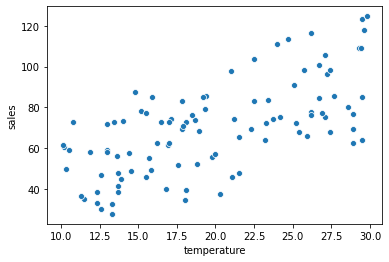

In [6]:
sns.scatterplot(x=temperature,y=sales)

### 2.5 Simple Regression Model

In [9]:
with pm.Model() as model:
    alpha=pm.Normal('alpha', mu=0, sd=1)
    beta=pm.Normal('beta',mu=0,sd=1)
    sigma=pm.HalfCauchy('sigma',5)
    
    mu=pm.Deterministic('mu',alpha+beta*temperature)
    y_pred=pm.Normal('y_pred',mu=mu,sd=sigma,observed=sales)
with model:
    trace = pm.sample(start=pm.find_MAP(), step=pm.NUTS(), n_init=1000,tune=1000, chains=4, random_seed=1)

logp = -441.82, ||grad|| = 0.72856: 100%|█████████████████████████████████████████████| 29/29 [00:00<00:00, 119.56it/s]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|█████████████████████████████████████████| 6000/6000 [01:25<00:00, 70.14draws/s]


### 2.7 Posterior Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F627C6C2B0>,
      dtype=object)

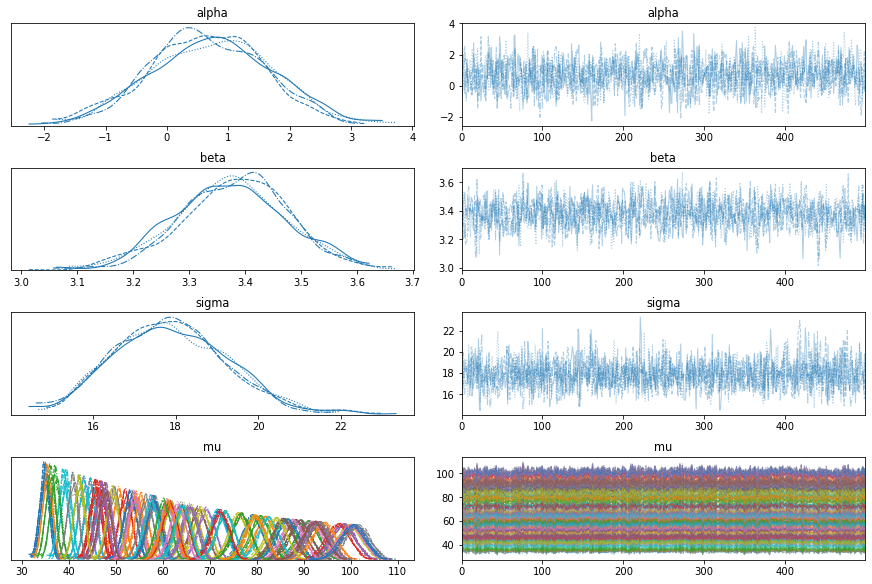

In [10]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F62C516828>,
      dtype=object)

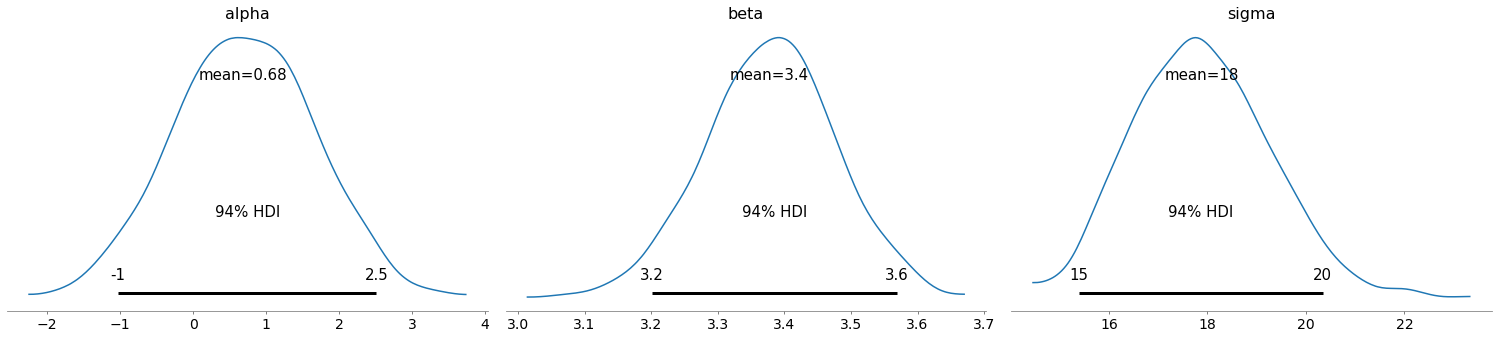

In [15]:
#Posterior
pm.plot_posterior(trace,var_names=['alpha','beta','sigma'])